<a href="https://colab.research.google.com/github/mwelland/ENGPHYS_3NM4/blob/main/Assignments/Midterm_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1:
You have a series of blocks connected by springs. You apply a force as shown.

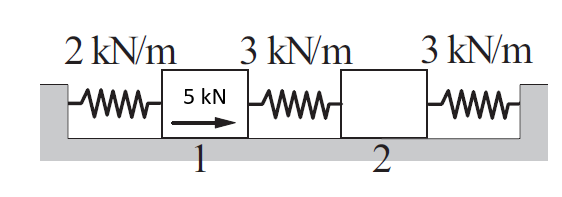

## 1a {1 point}
Write the system of equations for the displacements of block 1 and 2.

$$\begin{align}
-2 x_1+3 (x_2-x_1)+5 &=0 \\
-3 (x_2-x_1) - 3 x_2 &=0
\end{align}
$$



## 1b {1 point}
Solve for the displacements.

In [ ]:
# prompt: Solve the above for the displacements of block 1 and 2

# Define the equations as a system of linear equations
# -2x1 + 3(x2 - x1) + 5 = 0
# -3(x2 - x1) - 3x2 = 0

# Simplify the equations:
# -2x1 + 3x2 - 3x1 + 5 = 0
# -3x2 + 3x1 - 3x2 = 0

# -5x1 + 3x2 = -5
# 3x1 - 6x2 = 0

import numpy as np

# Coefficients matrix
A = np.array([[-5, 3], [3, -6]])

# Constants vector
b = np.array([-5, 0])

# Solve for x1 and x2
x = np.linalg.solve(A, b)

x1 = x[0]
x2 = x[1]

print("Displacement of block 1 (x1):", x1)
print("Displacement of block 2 (x2):", x2)

Displacement of block 1 (x1): 1.4285714285714288
Displacement of block 2 (x2): 0.7142857142857145




---

# Q2 {2 points}
Use a minimizer to find the minimum of:

$$[x-2]^2 -2 \cos(5 x)$$


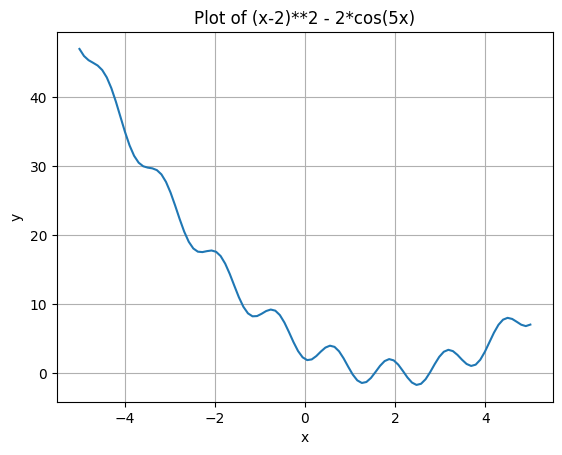

In [ ]:
# prompt: plot the above function

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = (x - 2)**2 - 2 * np.cos(5 * x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of (x-2)**2 - 2*cos(5x)')
plt.grid(True)
plt.show()

In [ ]:
# prompt: Now find the minimum using an optimizer starting at x = 2.5

from scipy.optimize import minimize

def objective_function(x):
  return (x - 2)**2 - 2 * np.cos(5 * x)

initial_guess = 2.5
result = minimize(objective_function, initial_guess)

print("Minimum value:", result.fun)
print("x value at minimum:", result.x)

Minimum value: -1.7466903123122548
x value at minimum: [2.49350185]




---

# Q3
TRISO2 (TRistructural ISOstropic 2) nuclear fuel is a spherical fuel design with a radius of 10mm. The boundary of the sphere is fixed at 300K.

You have data from a temperature probe in | x | y | z | T | format below.

In [ ]:
import numpy as np
data = np.array([[-2.41689854e+00,  4.84339485e+00, -6.16870630e+00,
         3.27795379e+02],
       [ 6.37459929e-01, -2.31322296e+00, -5.12925643e+00,
         3.62979958e+02],
       [-1.36585141e+00,  3.78414715e+00,  7.55713647e+00,
         3.22407378e+02],
       [-1.28436044e+00,  1.56279514e+00,  2.87315288e+00,
         3.85150405e+02],
       [-8.39743148e+00,  3.66068150e+00,  1.25910049e-01,
         3.13132895e+02],
       [ 6.01955390e-01, -1.33605143e+00,  9.72628945e+00,
         3.02574868e+02],
       [-1.45056695e+00, -8.95709338e+00, -2.97283166e+00,
         3.07088218e+02],
       [ 4.28093553e+00, -2.62182086e+00, -1.13247003e+00,
         3.69068889e+02],
       [-8.78201296e+00, -3.30560349e+00, -1.05490010e-01,
         3.09658982e+02],
       [ 2.72659396e-01, -5.15372488e-01, -9.32487868e+00,
         3.10300430e+02]])

##3a. What symmetries are present? {1 points}

This problem is spherically symmetric.
Boundary conditions:
1. The temperature at r = 10mm is 300.
2. The temperature gradient at r = 0 must be flat.

## 3b. Based on the symmetry, what are the two boundary conditions for this problem? {1 point}
HINT: Consider $\nabla T (r=0)$

## 3c: Fit a quadratic to this data and plot it. {4 points}

*   List item
*   List item



The zero gradient at r=0 means that the quadratic must be of the form: $T(r) =

*   List item
*   List item

a r^2 +b$. The boundary condition means $T(10) = a 10^2 +b = 300$. Therefore what you are really trying to do is fit the equation:

$$ T(r) = a r^2 + 300-100a $$

You can't use polyfit because that doesn't give you the option to do that. This is actually a curvefit / optimization problem!

In [ ]:
r = np.sqrt(data[:,0]**2+data[:,1]**2+data[:,2]**2)
T = data[:,3]

Fitted quadratic parameters:
a: -0.9364939624078523


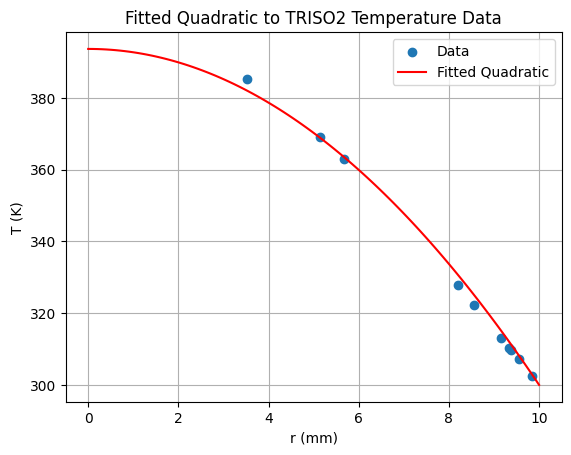

In [ ]:
# prompt: fit the function above to the data

from scipy.optimize import curve_fit

def quadratic_function(r, a):
  return a * r**2 + 300 - 100 * a

popt, _ = curve_fit(quadratic_function, r, T)

a = popt[0]

print("Fitted quadratic parameters:")
print("a:", a)

# Generate points for the fitted curve
r_fit = np.linspace(0, 10, 100)
T_fit = quadratic_function(r_fit, a)

# Plot the data and fitted curve
plt.scatter(r, T, label='Data')
plt.plot(r_fit, T_fit, label='Fitted Quadratic', color='red')
plt.xlabel('r (mm)')
plt.ylabel('T (K)')
plt.title('Fitted Quadratic to TRISO2 Temperature Data')
plt.legend()
plt.grid(True)
plt.show()